# 대출 승인 예측(Loan Approval Prediction)

이 노트북은 대출 승인 예측 - [대출 예측](https://www.kaggle.com/ninzaami/loan-predication/home) 데이터 세트를 기반으로 합니다. 대출 승인은 신용/은행 업계에서 가장 흔히 발생하는 문제입니다. 대출이 승인되기에 안전한지 여부를 어떻게 정확하게 예측할 수 있을까요? 이것이 우리가 이 노트에서 살펴볼 내용입니다.

## 1.패키지 및 데이터 가져오기

In [1]:
# 패키지 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm

# CSV 데이터 읽기
data = pd.read_csv("[Dataset] Module 19 (Loan Prediction).csv")

In [2]:
# 데이터 미리보기
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 특성:

1. 성별 : 남/여 (기본정보)

2. 결혼 여부: 예/아니오 (후보자의 부양 여부를 확인하기 위해 표시합니다.)

3. 피부양자 : 부양가족 수(후보자의 부채를 확인하기 위해 다시 기록합니다.)

4. 학력: 졸업/미졸업 (차용인의 대출상환능력을 이해하는데 도움이 됩니다.)

5. 자영업자 : 예/아니오 (차용인의 소득 흐름을 확인합니다.)

6. 공동 신청인 소득 : 숫자 (차용인의 대출 상환 능력을 이해하는 데 도움이됩니다.)

7. 대출금액: 숫자(대출자가 차용인의 상환가능성을 이해하는데 도움이됩니다.)

8. 대출기간 : 숫자 (대출자가 원금으로 총이자를 계산하는 데 도움이됩니다.)

9. 거주지역 : 도시/농촌/반도시(대출자의 생활수준을 이해하는데 도움이됩니다.)

10. 대출여부 : 예/아니오 (이는 대출기관의 최종 결정 사항입니다.)

## 2. 데이터 품질 및 누락 데이터 평가

데이터 세트에서 누락된 데이터를 찾습니다..

#### 누락된 데이터는 다음과 같은 여러 가지 이유로 인해 발생할 수 있습니다.

1. 검증 실패

2. 관찰 실패

3. 관찰 데이터 기록 실패

#### 누락된 데이터를 수정하는 것은 다음과 같은 이유로 매우 중요합니다.

1. ML 모델의 결정에 영향을 주어 모델의 정확도를 떨어뜨릴 수 있습니다.

2. 하나의 클래스로 모델을 편향되게 만들어 기록할 수 없는 부정확성을 초래합니다.

#### 항상 누락된 데이터의 수를 확인하는 것이 좋습니다.

1. 누락된 데이터의 수가 많은 경우 가능한 방법은 행/열의 평균을 취하여 누락된 위치의 데이터를 추정하는 것입니다.

2. 누락된 데이터의 수가 적으면 누락된 행을 삭제할 수 있습니다.

In [3]:
# 데이터 정보 미리보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# 누락된 값 확인
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 성별 - 누락된 값

In [5]:
# 누락된 "성별" 데이터의 %
print('Percent of missing "Gender" records is %.2f%%' %((data['Gender'].isnull().sum()/data.shape[0])*100))

Percent of missing "Gender" records is 2.12%


이 값은 성별 데이터에서 값이 누락되어 있는 비율입니다. 이를 감안하여야 합니다. 누락된 값은 일반적으로 데이터 세트에 불균형을 초래하여 기계 학습 모델의 예측에 영향을 미칩니다.

Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

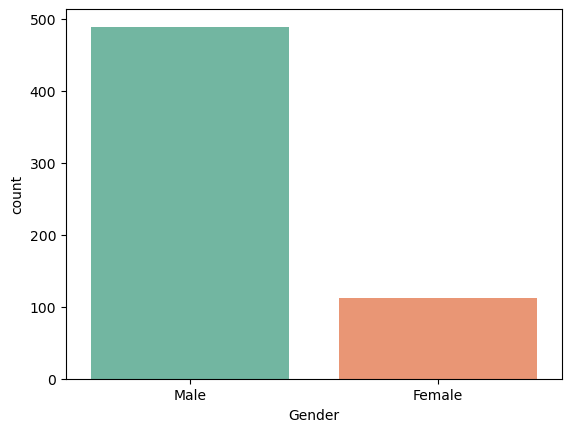

In [6]:
print("Number of people who take a loan group by gender :")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette = 'Set2')

### 결혼 여부 - 누락된 값

In [7]:
# 누락된 "결혼 여부" 데이터의 %
print('Percent of missing "Married" records is %.2f%%' %((data['Married'].isnull().sum()/data.shape[0])*100))

Percent of missing "Married" records is 0.49%


Number of people who take a loan group by marital status :
Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

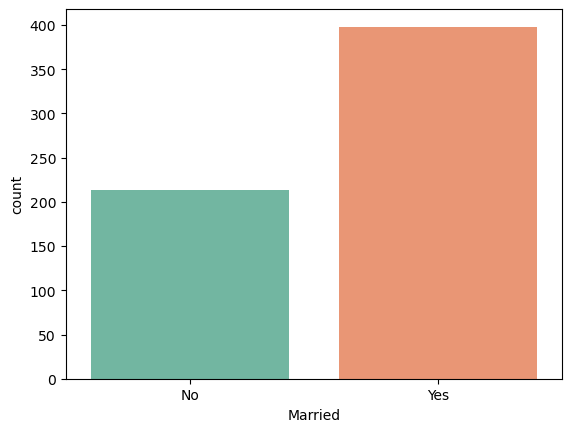

In [8]:
print("Number of people who take a loan group by marital status :")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette = 'Set2')

### 피부양자- 누락된 값

In [9]:
# 누락된 "피부양자" 데이터의 %
print('Percent of missing "Dependents" records is %.2f%%' %((data['Dependents'].isnull().sum()/data.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

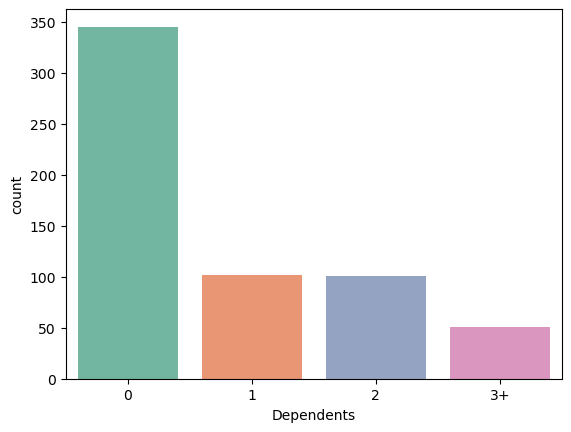

In [10]:
print("Number of people who take a loan group by dependents :")
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, palette = 'Set2')

### 자영업자 - 누락된 값

In [11]:
# 누락된 "자영업자" 데이터의 %
print('Percent of missing "Self_Employed" records is %.2f%%' %((data['Self_Employed'].isnull().sum()/data.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


Number of people who take a loan group by self employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

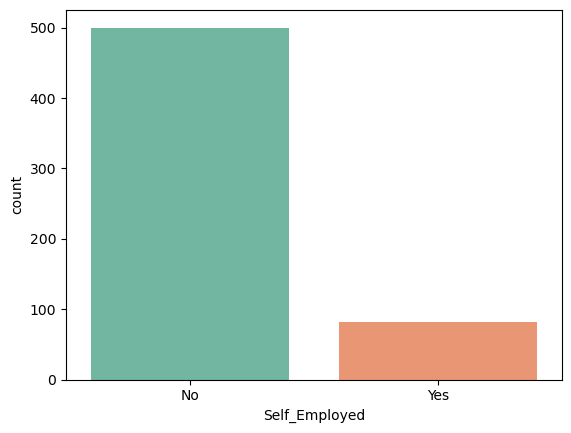

In [12]:
print("Number of people who take a loan group by self employed :")
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette = 'Set2')

### 대출금액 - 누락된 값

In [13]:
# 누락된 "대출금액" 데이터의 %
print('Percent of missing "LoanAmount" records is %.2f%%' %((data['LoanAmount'].isnull().sum()/data.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


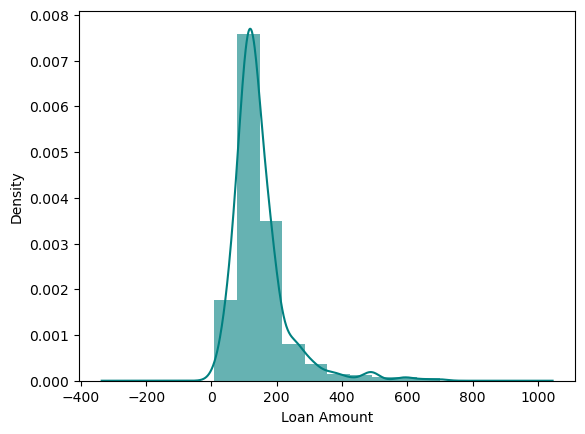

In [14]:
ax = data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

### 대출기간 - 누락된 값

In [15]:
# 누락된 "대출기간" 데이터의 %
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((data['Loan_Amount_Term'].isnull().sum()/data.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


Number of people who take a loan group by loan amount term :
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

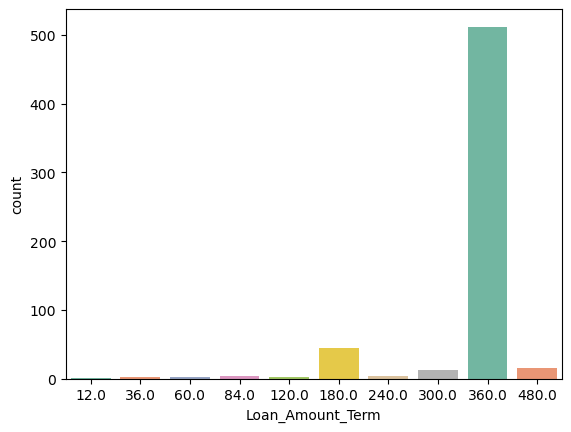

In [16]:
print("Number of people who take a loan group by loan amount term :")
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=data, palette = 'Set2')

### 신용 기록 - 누락된 값

In [17]:
# 누락된 "신용 기록" 데이터의 %
print('Percent of missing "Credit_History" records is %.2f%%' %((data['Credit_History'].isnull().sum()/data.shape[0])*100))

Percent of missing "Credit_History" records is 8.14%


Number of people who take a loan group by credit history :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

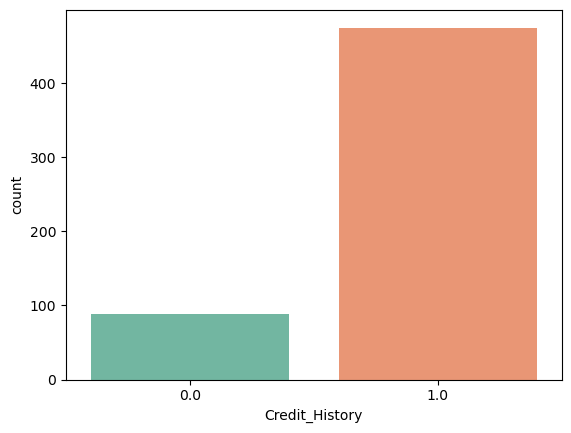

In [18]:
print("Number of people who take a loan group by credit history :")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette = 'Set2')

#### 모든 특성 및 열의 누락된 값을 파악하여 누락된 값을 대치하거나 삭제할 수 있습니다.



### 데이터 귀속 기준:
1. 특성이 본질적으로 범주형인 경우(예: 온도가 덥고, 습하고, 추울 수 있음) 가장 많이 발생하는 범주로 귀속할 수 있습니다.

2. 특성이 본질적으로 숫자인 경우(예: 사람의 키) 전체 특성의 평균 또는 중앙값을 취하여 누락된 행을 추정할 수 있습니다.


### 누락된 데이터/행을 삭제하기 전 주의 사항:

누락된 행의 수가 적은 경우에만 누락된 데이터를 삭제해야 합니다. 행을 삭제하면 누락된 데이터 문제를 해결할 수 있지만 해당 행의 다른 특성과 관련하여 데이터도 손실될 수 있습니다.

## 3. 데이터에 대한 최종 조정

데이터 세트의 누락된 값에 대한 평가를 기반으로 데이터를 다음과 같이 변경합니다.

* 주어진 행에 "성별"이 누락된 경우 남성(가장 일반적인 답변)으로 귀속합니다.
* 주어진 행에 "기혼여부"가 누락된 경우 예(가장 일반적인 답변)로 간주합니다.
* 주어진 행에 "부양자"가 누락된 경우 0(가장 일반적인 답변)으로 대치합니다.
* 주어진 행에 "자영업자"가 누락된 경우, no(가장 일반적인 답변)로 간주합니다.
* 주어진 행에 "대출금액"이 누락된 경우 데이터의 평균으로 대치합니다.
* 주어진 행에 "대출기간"이 누락된 경우 360(가장 일반적인 답변)으로 대치합니다.
* 주어진 행에 "신용 기록"이 누락된 경우 1.0(가장 일반적인 답변)으로 대치합니다.

In [19]:
train_data = data.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(skipna=True), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [20]:
# 누락된 값 확인
train_data.isnull().sum()
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### 범주형 데이터를 숫자 데이터로 변환합니다.

1. 다음 셀에서 기계 학습 모델은 숫자만 가져와서 연산을 수행할 수 있으므로 범주형 데이터를 숫자 데이터로 변환해야 합니다. 형식(그림, 텍스트)에 관계없이 모든 데이터는 기계 학습 모델을 학습하기 전에 숫자 형식으로 변환해야 합니다.

예를 들어 'gender' 특성은 각각 1과 0으로 변환되는 'Male'과 'Female'이라는 두 개의 카테고리가 있습니다.

'거주 지역' 기능에는 각각 0, 1, 2로 변환되는 '반도시', '도시', '농촌'의 세 가지 범주가 있습니다.

In [21]:
# 일부 개체 데이터 유형을 int64로 변환
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(yes_no_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)

#### 마지막으로 우리는 누락 데이터를 대체 후 데이터 세트에서 null 값의 총 수를 확인합니다. 모든 열/특성에서 null 값의 총 수가 감소한 것을 알 수 있습니다.

In [22]:
# 데이터 정보 미리보기
data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 이제 기계 학습 모델을 훈련하기 위해 전처리된 데이터를 사용할 수 있습니다.

## 4. 예측하기

In [23]:
# 기능 및 대상 분리
x = train_data.iloc[:,1:12]
y = train_data.iloc[:,12]

# 결과를 저장하고 표시하기 위해 변수를 만듭니다.
classifier = ('Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

#### 랜덤 포레스트 분류기(Random Forest Classifier)

In [24]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 76.71%


#### 의사 결정 트리 분류기(Decision Tree Classifier)

In [25]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 70.69%


#### k-최근접 이웃 분류기(K- Nearest Neighbours Classifiers)

In [26]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 61.40%


#### 선형 SVM(Support Vector Machines) 분류기

In [27]:
clf  =  svm.LinearSVC(max_iter=5000)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

c:\Users\gadi2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gadi2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gadi2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\gadi2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The accuration of classification is 67.43%


c:\Users\gadi2\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 이제 각 분류기의 결과를 비교할 수 있습니다.

In [28]:
from tabulate import tabulate
tab=[['Machine Learing Model', 'Accuracy %']]
for i in range(len(score)):
    table = [classifier[i],score[i]*100]
    tab.append(table)
print(tabulate(tab))


---------------------  -----------------
Machine Learing Model  Accuracy %
Random Forest          76.7093162734906
Decision Tree          70.68905771024923
K-Nearest Neighbor     61.40077302412368
SVM                    67.43036118885779
---------------------  -----------------


In [29]:
print('The Best model is {} with a accuracy of {}'.format(classifier[score.index(max(score))],max(score)*100))

The Best model is Random Forest with a accuracy of 76.7093162734906


## 5. Result

결과는 랜덤 포레스트 분류기(Random Forest Classifier)가 분류 알고리즘 중에서 가장 높은 점수를 받았습니다.

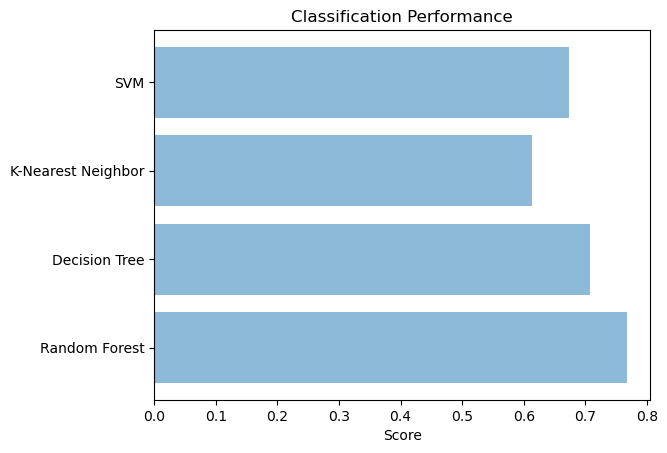

In [30]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

## Reference
1. J. Heo and J. Y. Yang, "AdaBoost Based Bankruptcy Forecasting of Korean Construction Company," Applied Soft Computing, vol. 24, pp. 494-499, 2014.
2. C.-F. Tsai, "Feature Selection in Bankruptcy Prediction," Knowledge Based System, pp. 120-127, 2009.